<a href="https://colab.research.google.com/github/hyperkraz/MAT421/blob/main/L15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P15.1.1

P15.1.2

In [32]:
import numpy as np

In [33]:
def myimpeuler(f,tspan,y0,N,params):
  h = float(tspan[1]-tspan[0])/N
  t = tspan[0]; y = y0
  tout = np.zeros((N+1,1)); yout = np.zeros((N+1,np.size(y0)))
  tout[0] = t; yout[0] = y
  for n in range(1,N+1):
    k1 = f(t,y,params)
    k2 = f(t+h,y+h*k1,params)
    t += h
    y += h*(k1+k2)/2.0
    tout[n] = t; yout[n] = y
  return tout,yout


In [34]:
def myeuler(f,tspan,y0,N,params):
  h = float(tspan[1]-tspan[0])/N # time step
  t = tspan[0]; y = y0
  tout = [0]*(N+1); yout = [0]*(N+1) # reserve space for output
  tout[0] = t; yout[0] = y # set initial t and y
  for n in range(1,N+1): # n=1..N
    f1 = f(t,y,params) # y' @ current t
    t += h # update t
    y += h*f1 # update y
    tout[n] = t; yout[n] = y
  return tout,yout

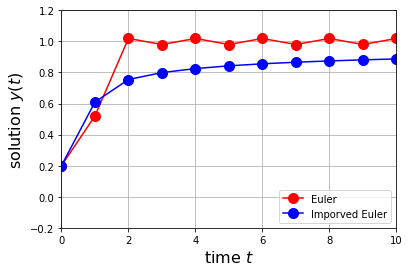

In [35]:
def rhs(t,y,params):
  return params['a']*y*(1.-y)

tspan = [0, 10]
N = 10
params = {'a':2}
y0 = 0.2
t,y = myimpeuler(rhs,tspan,y0,N,params)

from matplotlib.pyplot import close, figure, plot, axis, grid, xlabel, ylabel, legend, savefig, show
figure(1)
t,y = myeuler(rhs,tspan,y0,N,params)
timp,yimp = myimpeuler(rhs,tspan,y0,N,params)
plot(t,y,'.-',markersize=20,color='r',label = 'Euler')
plot(timp, yimp,'.-',markersize=20,color='b', label = 'Imporved Euler')
axis(tspan+[-.2,1.2])
grid()
xlabel(r'time $t$',fontsize=16)
ylabel(r'solution $y(t)$',fontsize=16)
legend(loc='lower right')
savefig('myode_a2.png', bbox_inches='tight', dpi=900)

P15.2.1

P16.2.1